In [85]:
from datetime import date, datetime, timedelta

from binance.binance_k_line_repository import load_k_lines

interval_days = 16
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1684195200000,1815.56,1817.06,1814.31,1817.06,6023.345,1684195259999,1.093699e+07,3936,4175.486,7.582582e+06,0
1,1684195260000,1817.05,1817.68,1812.80,1815.10,14224.318,1684195319999,2.580897e+07,5666,4403.094,7.990302e+06,0
2,1684195320000,1815.09,1815.10,1814.00,1814.51,2339.169,1684195379999,4.244340e+06,1895,1077.397,1.954772e+06,0
3,1684195380000,1814.50,1815.03,1813.06,1814.74,5227.056,1684195439999,9.481035e+06,3171,2442.318,4.430081e+06,0
4,1684195440000,1814.73,1814.90,1813.70,1814.62,2386.623,1684195499999,4.329891e+06,1757,1311.952,2.380133e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685577300000,1873.17,1874.41,1873.08,1874.41,4202.478,1685577359999,7.873024e+06,1590,2667.404,4.997601e+06,0
1436,1685577360000,1874.40,1874.41,1872.54,1872.80,3444.416,1685577419999,6.454170e+06,1565,401.812,7.527455e+05,0
1437,1685577420000,1872.81,1873.44,1872.64,1872.84,1423.699,1685577479999,2.666499e+06,1428,820.822,1.537314e+06,0
1438,1685577480000,1872.84,1872.95,1872.53,1872.83,820.012,1685577539999,1.535584e+06,910,353.406,6.618053e+05,0


In [86]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-16 00:00:00,1817.06
2023-05-16 00:01:00,1815.10
2023-05-16 00:02:00,1814.51
2023-05-16 00:03:00,1814.74
2023-05-16 00:04:00,1814.62
...,...
2023-05-31 23:55:00,1874.41
2023-05-31 23:56:00,1872.80
2023-05-31 23:57:00,1872.84


In [87]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()
    
# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

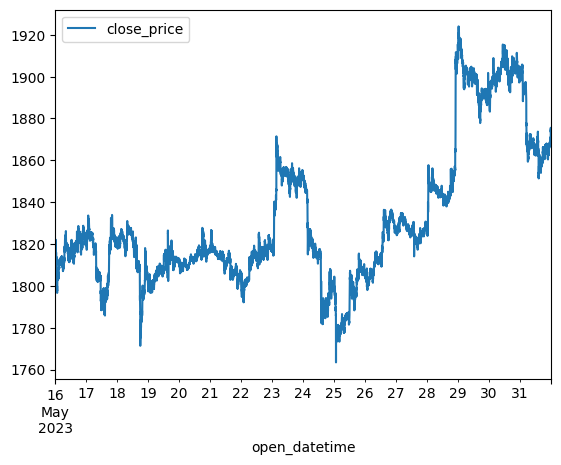

In [88]:
k_lines.plot.line(use_index=True)

In [89]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)


k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,
2023-05-16 00:16:00,1817.12,1.000072,0.999986,0.999862,0.999783,0.999350,1.0
2023-05-16 00:17:00,1818.48,0.999252,0.999288,0.999189,0.999123,0.998604,1.0
2023-05-16 00:18:00,1819.57,0.999401,0.999027,0.998834,0.998634,0.998122,0.0
2023-05-16 00:19:00,1819.18,1.000214,0.999915,0.999409,0.999041,0.998510,0.0
2023-05-16 00:20:00,1818.93,1.000137,1.000245,0.999812,0.999340,0.998800,1.0
...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,1.0


In [90]:
test_k_lines_ratio = .2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

ml_test_dataset_size = 300

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,
2023-05-16 00:16:00,1817.12,1.000072,0.999986,0.999862,0.999783,0.999350,1.0
2023-05-16 00:17:00,1818.48,0.999252,0.999288,0.999189,0.999123,0.998604,1.0
2023-05-16 00:18:00,1819.57,0.999401,0.999027,0.998834,0.998634,0.998122,0.0
2023-05-16 00:19:00,1819.18,1.000214,0.999915,0.999409,0.999041,0.998510,0.0
2023-05-16 00:20:00,1818.93,1.000137,1.000245,0.999812,0.999340,0.998800,1.0
...,...,...,...,...,...,...,...
2023-05-28 19:09:00,1852.05,0.999449,0.999544,0.999231,0.998705,0.999406,0.0
2023-05-28 19:10:00,1851.63,1.000227,0.999951,0.999757,0.999156,0.999499,0.0
2023-05-28 19:11:00,1851.41,1.000119,1.000232,1.000061,0.999417,0.999543,0.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,
2023-05-28 19:14:00,1851.86,1.000232,0.999949,0.999883,0.999758,0.999237,0.0
2023-05-28 19:15:00,1851.69,1.000092,1.000208,1.000005,0.999957,0.999355,0.0
2023-05-28 19:16:00,1850.75,1.000508,1.000554,1.000551,1.000486,0.999896,0.0
2023-05-28 19:17:00,1850.52,1.000124,1.000378,1.000609,1.000592,1.000061,0.0
2023-05-28 19:18:00,1849.14,1.000746,1.000808,1.001117,1.001235,1.000868,1.0
...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,1.0


In [91]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    # "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_test_predicted_values.name = f"predicted_{model_target_column}"

model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
display(model_test_target_and_predicted_values)

,is_next_close_price_greater,predicted_is_next_close_price_greater
open_datetime,,
2023-05-28 19:14:00,0.0,1.0
2023-05-28 19:15:00,0.0,0.0
2023-05-28 19:16:00,0.0,1.0
2023-05-28 19:17:00,0.0,0.0
2023-05-28 19:18:00,1.0,1.0
...,...,...
2023-05-31 23:54:00,1.0,0.0
2023-05-31 23:55:00,0.0,0.0
2023-05-31 23:56:00,1.0,0.0


In [92]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(precision_score(model_test_target_values, model_test_predicted_values))
display(recall_score(model_test_target_values, model_test_predicted_values))
display(
    "accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)
display(f1_score(model_test_target_values, model_test_predicted_values))

0.5146235220908525

0.36271929824561405

'accuracy_score = 0.5150922909880564'

0.4255209673269874

In [93]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,2325,2998
1.0,2280,1607
